In [ ]:
!curl -L -o customer-segmentation-tutorial-in-python.zip https://www.kaggle.com/api/v1/datasets/download/vjchoudhary7/customer-segmentation-tutorial-in-python


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  1583  100  1583    0     0   2514      0 --:--:-- --:--:-- --:--:-- 13082


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
df = pd.read_csv('Mall_Customers.csv')
df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [ ]:
# Data Preprocessing

print(f"Missing Value: {df.isnull().sum()}")
print(f"Duplicate Value: {df.duplicated().sum()}")

Missing Value: CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64
Duplicate Value: 0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
# Menghapus feature CustomerID
df.drop('CustomerID', axis = 1, inplace = True)
df.rename(columns = {'Annual Income (k$)': 'Annual Income'}, inplace = True)
df.rename(columns = {'Spending Score (1-100)': 'Spending Score'}, inplace = True)

# Mengubah nilai male dan female menjadi numeric
from sklearn.preprocessing import StandardScaler, LabelEncoder
labeler = LabelEncoder()
df['Gender'] = labeler.fit_transform(df['Gender'])
df

,Gender,Age,Annual Income,Spending Score
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


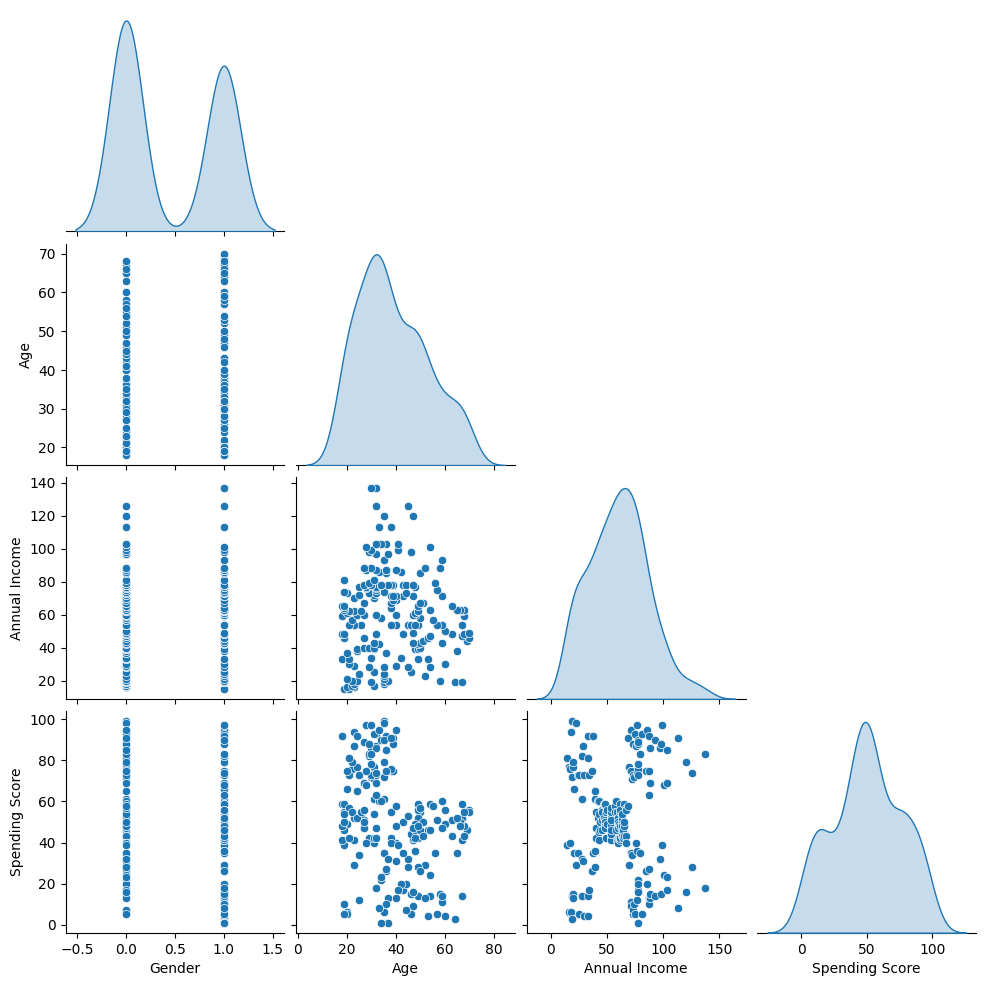

In [ ]:
# Melihat persebaran data
sns.pairplot(df,corner=True, diag_kind="kde")
plt.show()

# Pengunjung Mall lebih banyak perempuan (112)
# Laki-laki berjumlah 88

In [ ]:
df.describe()

,Gender,Age,Annual Income,Spending Score
count,200.000000,200.000000,200.000000,200.000000
mean,0.440000,38.850000,60.560000,50.200000
std,0.497633,13.969007,26.264721,25.823522
min,0.000000,18.000000,15.000000,1.000000
25%,0.000000,28.750000,41.500000,34.750000
50%,0.000000,36.000000,61.500000,50.000000
75%,1.000000,49.000000,78.000000,73.000000
max,1.000000,70.000000,137.000000,99.000000


In [ ]:
# Jarak data beragam, dilakukan normalisasi terhadap data menggunakan Z-score

# Scaling data kecuali gender
scaler = StandardScaler()
df_scaled = df.drop('Gender', axis = 1)

# Process Scaling
df_scaled = pd.DataFrame(scaler.fit_transform(df_scaled), columns = df_scaled.columns)
df_scaled.head()

,Age,Annual Income,Spending Score
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


Text(0, 0.5, 'Inertia')

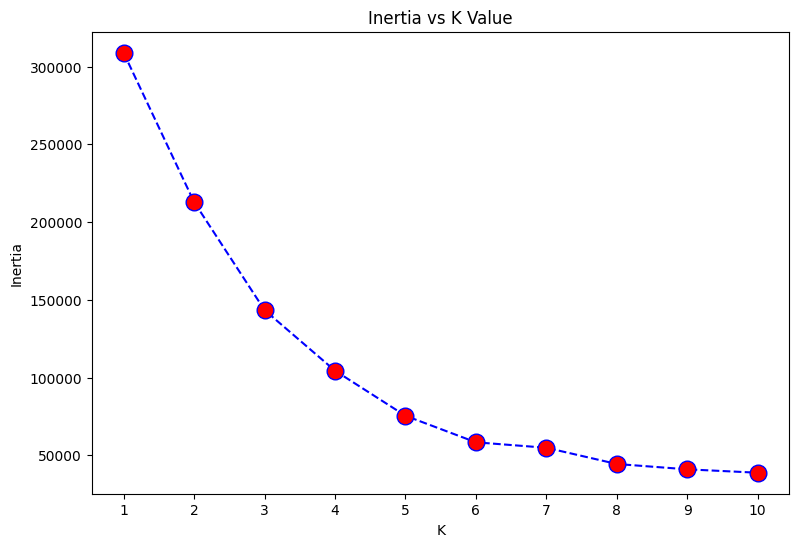

In [ ]:
# Training Model
from sklearn.cluster import KMeans
inertia_list = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df)
    inertia_list.append(kmeans.inertia_)

plt.figure(figsize = (9,6))
plt.plot(range(1,11), inertia_list, color = 'blue',
         linestyle = 'dashed', marker = 'o',
         markerfacecolor = 'red', markersize = 12)
plt.title('Inertia vs K Value') # The Elbow Method, menyerupai siku tangan
plt.xticks(range(1,11,1))
plt.xlabel('K')
plt.ylabel('Inertia')

# Hasilnya kok acak?

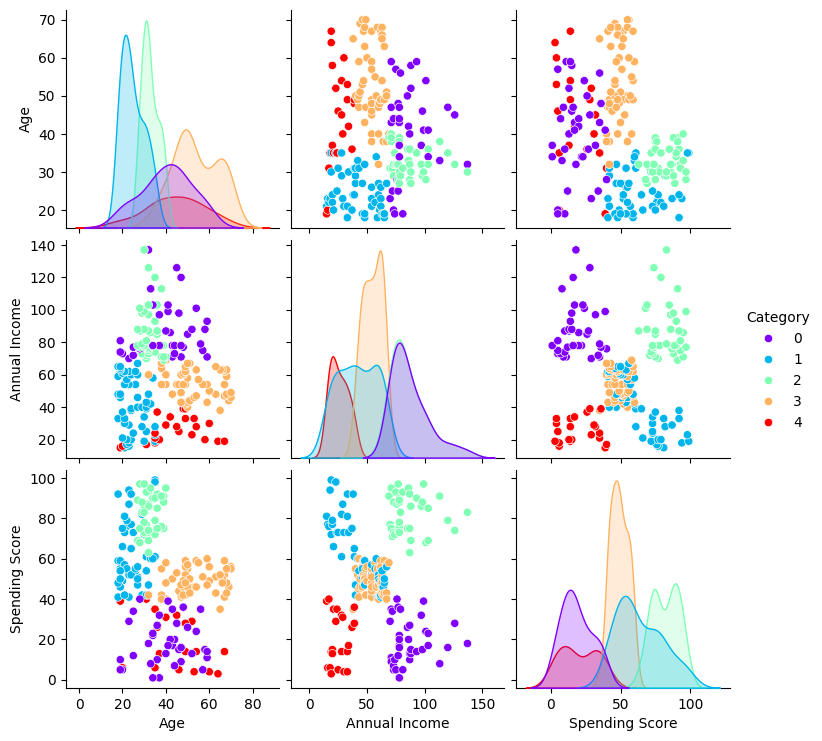

In [ ]:
km = KMeans(n_clusters = 5).fit(df)

# Membaca kembali original data ke variabel lain
# Karena data untuk klustering telah diubah"

df_ori = pd.read_csv('Mall_Customers.csv')
df_ori.drop('CustomerID', axis = 1, inplace = True)
df_ori.rename(columns = {'Annual Income (k$)': 'Annual Income'}, inplace = True)
df_ori.rename(columns = {'Spending Score (1-100)': 'Spending Score'}, inplace = True)

# Membuat satu kolom kategori untuk menampung hasil kluster
df_ori['Category'] = km.labels_
sns.pairplot(data = df_ori, hue = 'Category', palette = 'rainbow')

/tmp/ipython-input-3922335960.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data = df_ori, x = 'Gender', palette = 'rainbow')


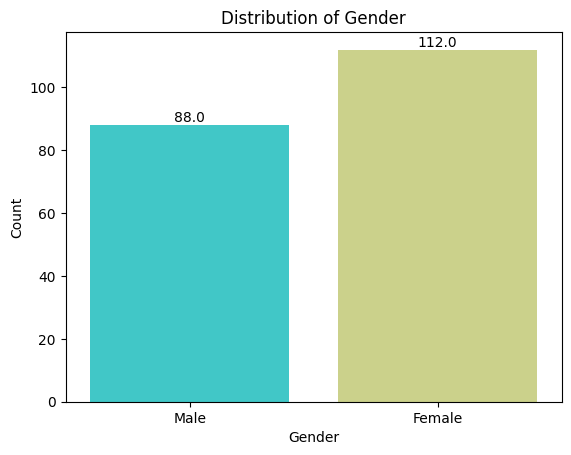

In [ ]:
# Create a bar plot to show the count of each gender
ax = sns.countplot(data = df_ori, x = 'Gender', palette = 'rainbow')
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')

# Add counts on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

/tmp/ipython-input-110486318.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=age_filtered_df, x='Age', palette='rainbow')


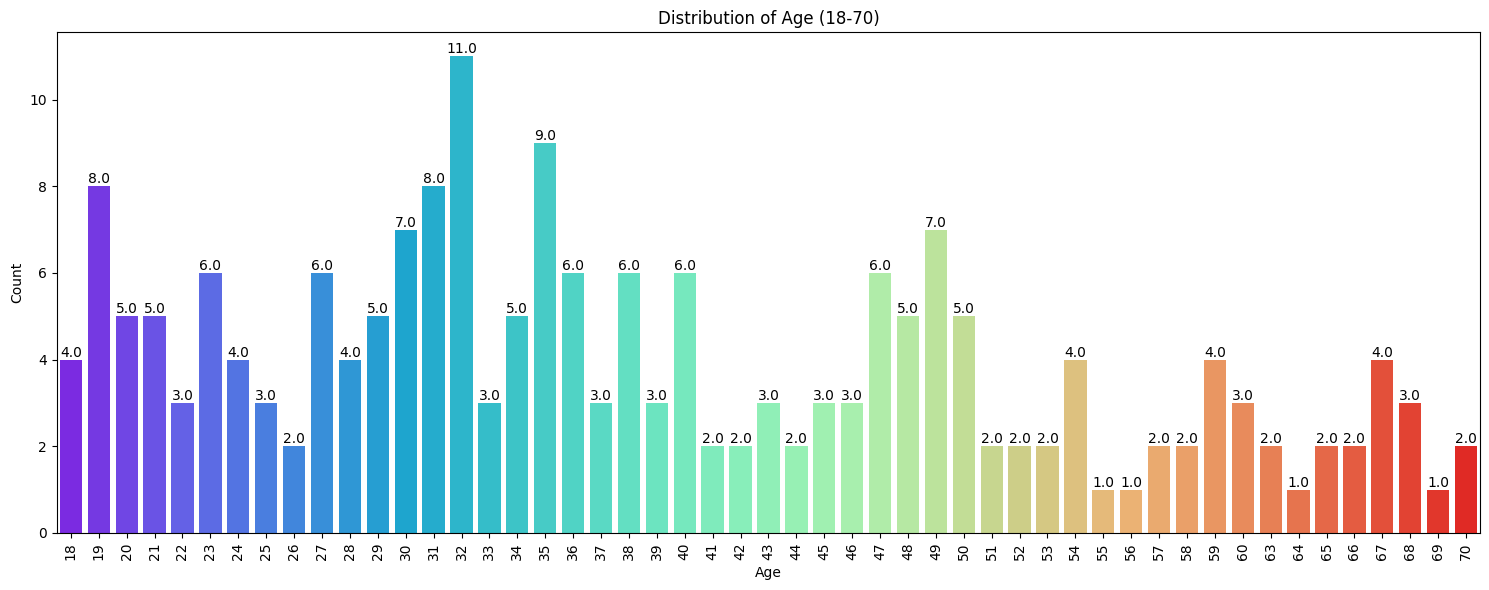

In [ ]:
# Filter the data for ages between 18 and 70
age_filtered_df = df_ori[(df_ori['Age'] >= 18) & (df_ori['Age'] <= 70)]

# Create a bar plot to show the age distribution
plt.figure(figsize=(15, 6))
ax = sns.countplot(data=age_filtered_df, x='Age', palette='rainbow')
plt.title('Distribution of Age (18-70)')
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(rotation=90)

# Add counts on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()

/tmp/ipython-input-3397771609.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x = 'Category', y = 'Age', data = df_ori, ax = axes[0], palette= 'rainbow')
/tmp/ipython-input-3397771609.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x = 'Category', y = 'Annual Income', data = df_ori, ax = axes[1], palette= 'rainbow')
/tmp/ipython-input-3397771609.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x = 'Category', y = 'Spending Score', data = df_ori, ax = axes[2], palette= 'rainbow')


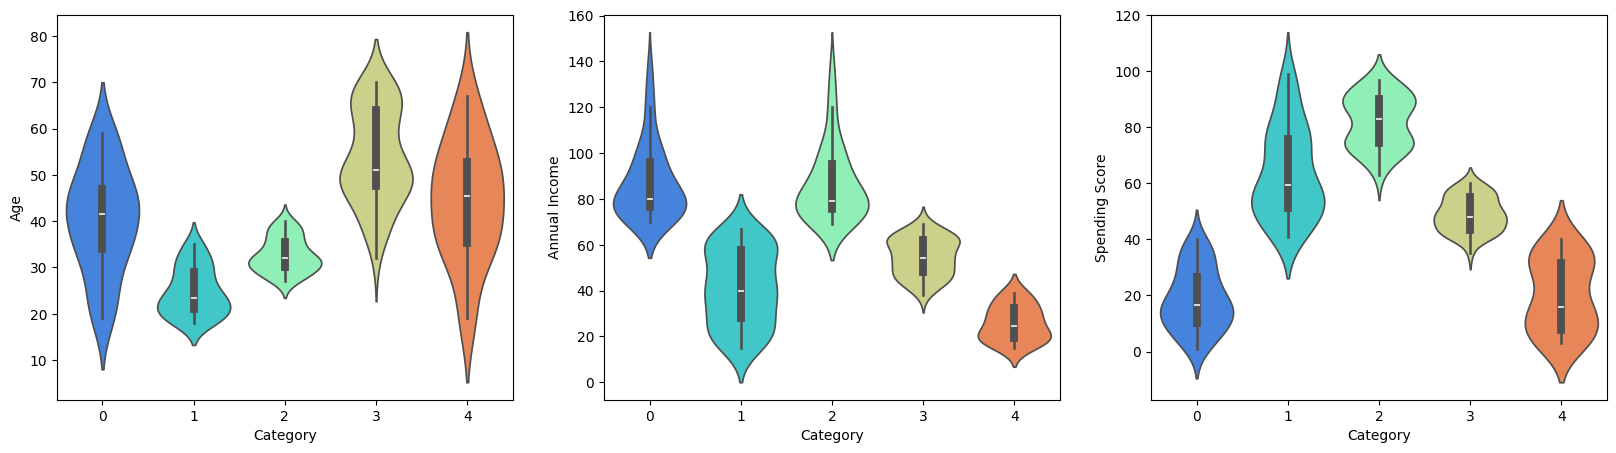

In [ ]:
fig, axes = plt.subplots(1,3, figsize=(20,5))
sns.violinplot(x = 'Category', y = 'Age', data = df_ori, ax = axes[0], palette= 'rainbow')
sns.violinplot(x = 'Category', y = 'Annual Income', data = df_ori, ax = axes[1], palette= 'rainbow')
sns.violinplot(x = 'Category', y = 'Spending Score', data = df_ori, ax = axes[2], palette= 'rainbow')
plt.show()

In [ ]:
# Pembagian Kelompok Final
df_ori[['Age', 'Annual Income', 'Spending Score', 'Category']].groupby('Category').mean()

,Age,Annual Income,Spending Score
Category,,,
0,40.394737,87.000000,18.631579
1,24.800000,41.460000,63.700000
2,32.692308,86.538462,82.128205
3,53.823529,54.725490,48.980392
4,44.318182,25.772727,20.272727


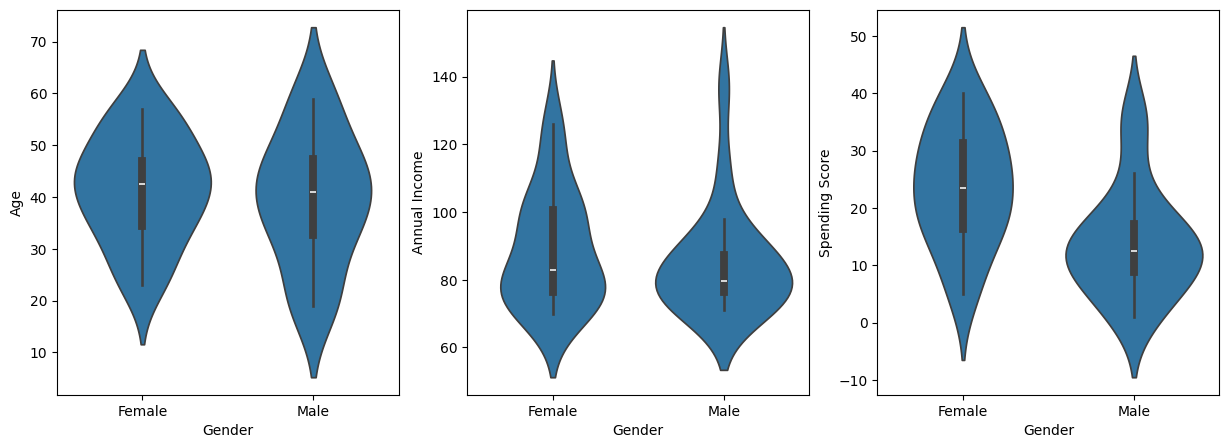

In [ ]:
# Kelompok 1 (Cat 0)
# Memiliki rata-rata umur 40 tahun dengan rata-rata annual income $87 K
# dan spending score 18.6
group1 = df_ori[df_ori['Category'] == 0]
group1.head()

fig, axes = plt.subplots(1,3, figsize=(15,5))
sns.violinplot(x = 'Gender', y = 'Age', data = group1, ax = axes[0])
sns.violinplot(x = 'Gender', y = 'Annual Income', data = group1, ax = axes[1])
sns.violinplot(x = 'Gender', y = 'Spending Score', data = group1, ax = axes[2])
plt.show()

# Memiliki kelompok pria dan wanita paruh baya
# yang memiliki annual income yang tinggi dan spending yang rendah

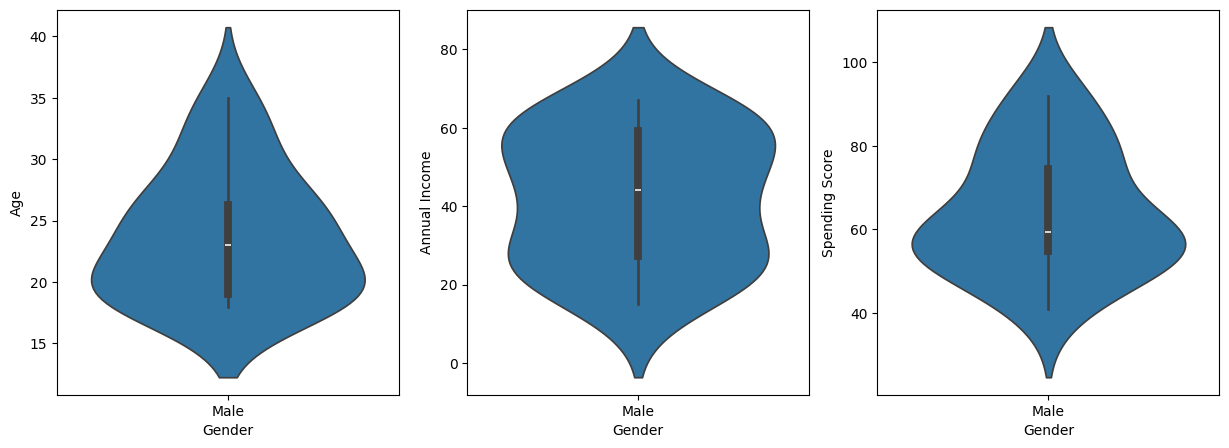

In [ ]:
# Kelompok 2 (Cat 1)
# Memiliki rata-rata umur 25 tahun dengan rata-rata annual income $41 K
# dan spending score 63.7
group2 = df_ori[df_ori['Category'] == 1]
group2.head()

group2 = group2[group2['Gender'] == 'Male']

fig, axes = plt.subplots(1,3, figsize=(15,5))
sns.violinplot(x = 'Gender', y = 'Age', data = group2, ax = axes[0])
sns.violinplot(x = 'Gender', y = 'Annual Income', data = group2, ax = axes[1])
sns.violinplot(x = 'Gender', y = 'Spending Score', data = group2, ax = axes[2])
plt.show()

# Pria paruh baya yang memiliki pendapatan medium dengan spending
# Medium

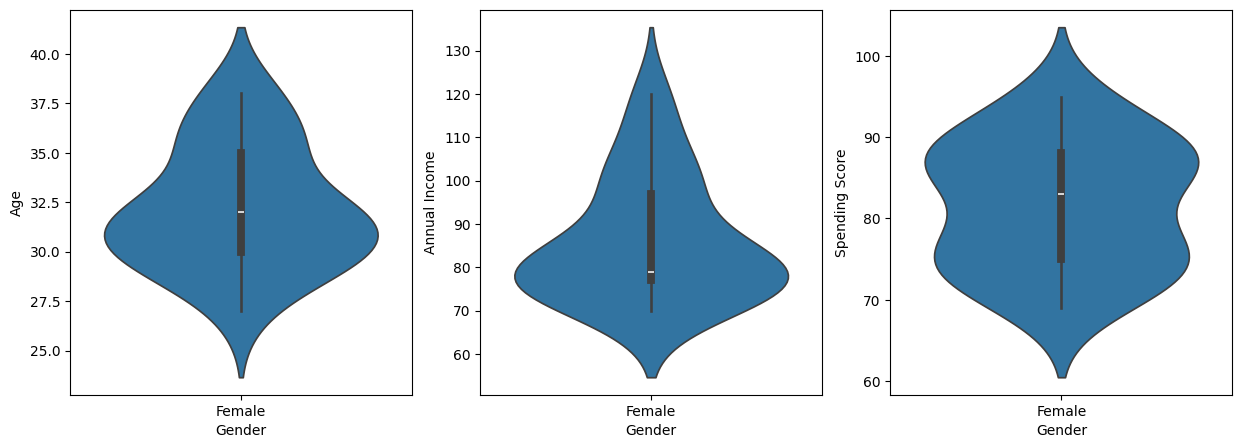

In [ ]:
# Kelompok 3 (Cat 2)
# Memiliki rata-rata umur 33 tahun dengan rata-rata annual income $86K
# dan spending score 82
group3 = df_ori[df_ori['Category'] == 2]
group3.head()

group3 = group3[group3['Gender'] == 'Female']

fig, axes = plt.subplots(1,3, figsize=(15,5))
sns.violinplot(x = 'Gender', y = 'Age', data = group3, ax = axes[0])
sns.violinplot(x = 'Gender', y = 'Annual Income', data = group3, ax = axes[1])
sns.violinplot(x = 'Gender', y = 'Spending Score', data = group3, ax = axes[2])
plt.show()

# Kelompok wanita dengan pendapatan menengah ke atas
# Dengan spending Medium

'\n• Kelompok 0 merepresentasikan pelanggan dengan annual income sangat rendah, \nspending score rendah, dan rentang umur yang beragam \n• Kelompok 1 merepresentasikan pelanggan dengan annual income agak rendah, \nspending score agak rendah, dan memiliki rentang umur menengah hingga tua \n• Kelompok 2 merepresentasikan pelanggan dengan rentang umur menengah ke arah \nmuda, annual income menengah hingga tinggi, serta spending score yang tinggi \n• Kelompok 3 merepresentasikan pelanggan dengan rentang umur muda, annual \nincome yang rendah, serta spending score yang menengah hingga tinggi \n• Kelompok 4 merepresentasikan pelanggan dengan umur yang beragam, annual \nincome menengah hingga tinggi, serta spending score yang rendah\n'

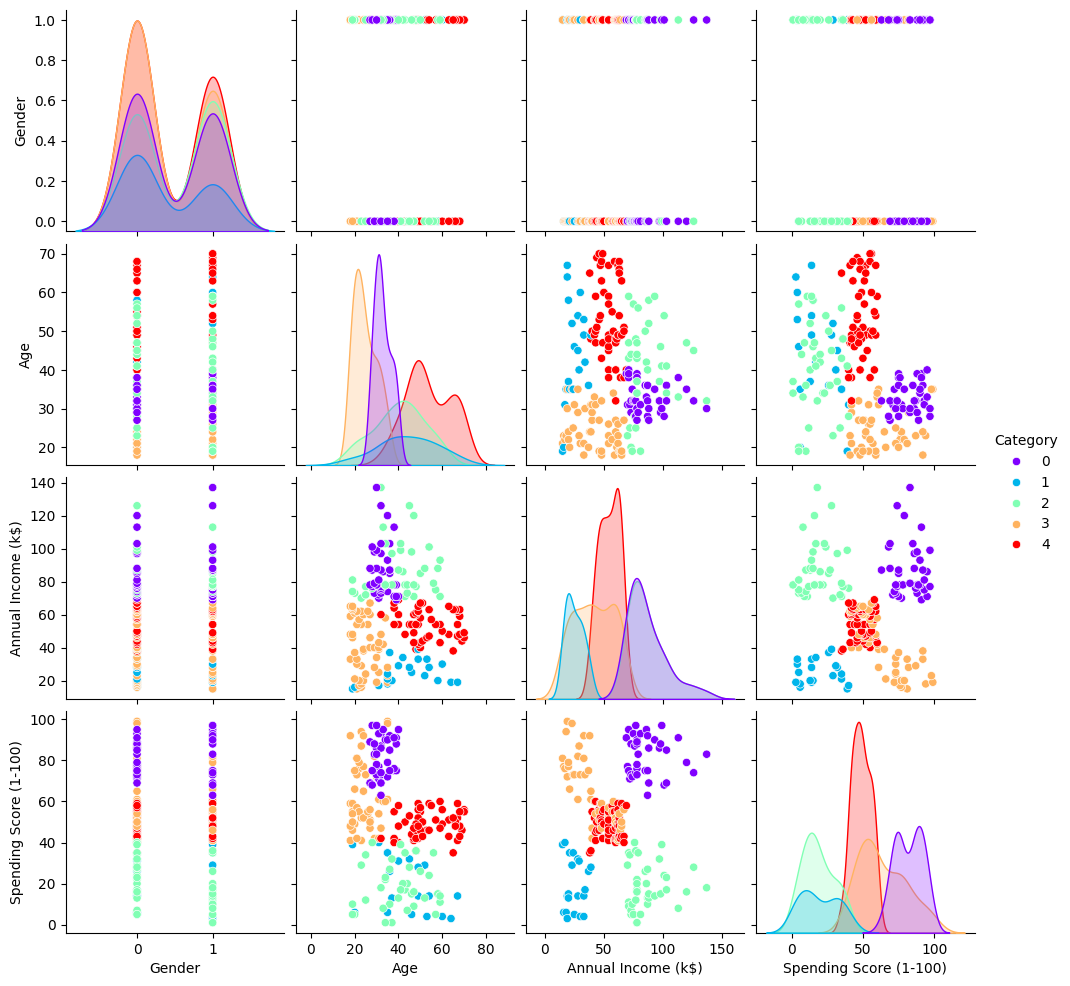

In [ ]:
# KMeans akan lebih mudah jika data dibagi berdasarkan gender
df.drop('Gender', axis = 1)
km = KMeans(n_clusters = 5).fit(df)

# Membaca kembali orig data ke var lain
mall_ori = pd.read_csv('Mall_Customers.csv')
mall_ori.drop('CustomerID', axis = 1, inplace = True)
mall_ori['Gender'] = labeler.fit_transform(mall_ori['Gender'])

# Membuat satu kolom cat untuk menampung hasil kluster
mall_ori['Category'] = km.labels_
sns.pairplot(data = mall_ori, hue = 'Category', palette = 'rainbow')

"""
• Kelompok 0 merepresentasikan pelanggan dengan annual income sangat rendah,
spending score rendah, dan rentang umur yang beragam
• Kelompok 1 merepresentasikan pelanggan dengan annual income agak rendah,
spending score agak rendah, dan memiliki rentang umur menengah hingga tua
• Kelompok 2 merepresentasikan pelanggan dengan rentang umur menengah ke arah
muda, annual income menengah hingga tinggi, serta spending score yang tinggi
• Kelompok 3 merepresentasikan pelanggan dengan rentang umur muda, annual
income yang rendah, serta spending score yang menengah hingga tinggi
• Kelompok 4 merepresentasikan pelanggan dengan umur yang beragam, annual
income menengah hingga tinggi, serta spending score yang rendah
"""